In [83]:
#import the necessary packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import geodatasets

# the code below sets the text to LaTEX font
plt.rcParams['text.usetex'] = True
# the code below sets the default figure and text size for all plots
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

custom_palette = sns.color_palette("icefire")


In [84]:
# open the .csv file - the "header=0" part sets the first row as header of the dataframe
df = pd.read_csv('book_list.csv', header=0)
for i in df.columns:
  print("column name: ", i)
# now, I don't want to show the last column, i.e. Unnamed:10 --> I will delete it
df = df.drop(df.columns[-1], axis=1)

column name:  title
column name:  # pages
column name:  year of publication
column name:  author
column name:  publisher
column name:  year of birth
column name:  year of death
column name:  nationality
column name:  sex
column name:  language
column name:  Unnamed: 10


In [85]:
df

,title,# pages,year of publication,author,publisher,year of birth,year of death,nationality,sex,language
0,la valle oscura,309,2020,anna wiener,adelphi,1987,/,United States of America,f,italiano
1,gioco all'alba,152,1961,arthur schnitzler,adelphi,1862,1931,Austria,m,italiano
2,il ritorno di casanova,149,1900,arthur schnitzler,adelphi,1862,1931,Austria,m,italiano
3,helgoland,227,2020,carlo rovelli,adelphi,1956,/,Italy,m,italiano
4,"godel, escher, bach",852,1979,douglas r. hofstadter,adelphi,1977,/,United States of America,m,italiano
...,...,...,...,...,...,...,...,...,...,...
452,sociologia della religione - induismo e buddhismo,327,1916,max weber,newton compton,1864,1920,Germany,m,italiano
453,storia d'europa dalle invasioni al XVI secolo,441,1936,hernri pirenne,newton compton,1862,1935,Belgium,m,italiano
454,the longest journey,327,1907,edward morgan forster,new directions,1879,1970,England,m,english
455,macbeth,190,1606,william shakespeare,Thomson Learning,/,1616,England,m,english


In [86]:
# morevoer, I want the row index to start from 1 and not from 0
df = df.reset_index(drop=True)
df.index += 1
df

,title,# pages,year of publication,author,publisher,year of birth,year of death,nationality,sex,language
1,la valle oscura,309,2020,anna wiener,adelphi,1987,/,United States of America,f,italiano
2,gioco all'alba,152,1961,arthur schnitzler,adelphi,1862,1931,Austria,m,italiano
3,il ritorno di casanova,149,1900,arthur schnitzler,adelphi,1862,1931,Austria,m,italiano
4,helgoland,227,2020,carlo rovelli,adelphi,1956,/,Italy,m,italiano
5,"godel, escher, bach",852,1979,douglas r. hofstadter,adelphi,1977,/,United States of America,m,italiano
...,...,...,...,...,...,...,...,...,...,...
453,sociologia della religione - induismo e buddhismo,327,1916,max weber,newton compton,1864,1920,Germany,m,italiano
454,storia d'europa dalle invasioni al XVI secolo,441,1936,hernri pirenne,newton compton,1862,1935,Belgium,m,italiano
455,the longest journey,327,1907,edward morgan forster,new directions,1879,1970,England,m,english
456,macbeth,190,1606,william shakespeare,Thomson Learning,/,1616,England,m,english


In [87]:
#now I want to extract some information about the number of pages of these books
num_pag = df['# pages'] # I create an array from the column of the panda dataframe df['# pages']
mean_page = num_pag.mean()
median_page = num_pag.median()
quartiles_page = num_pag.quantile([0.25,0.75])

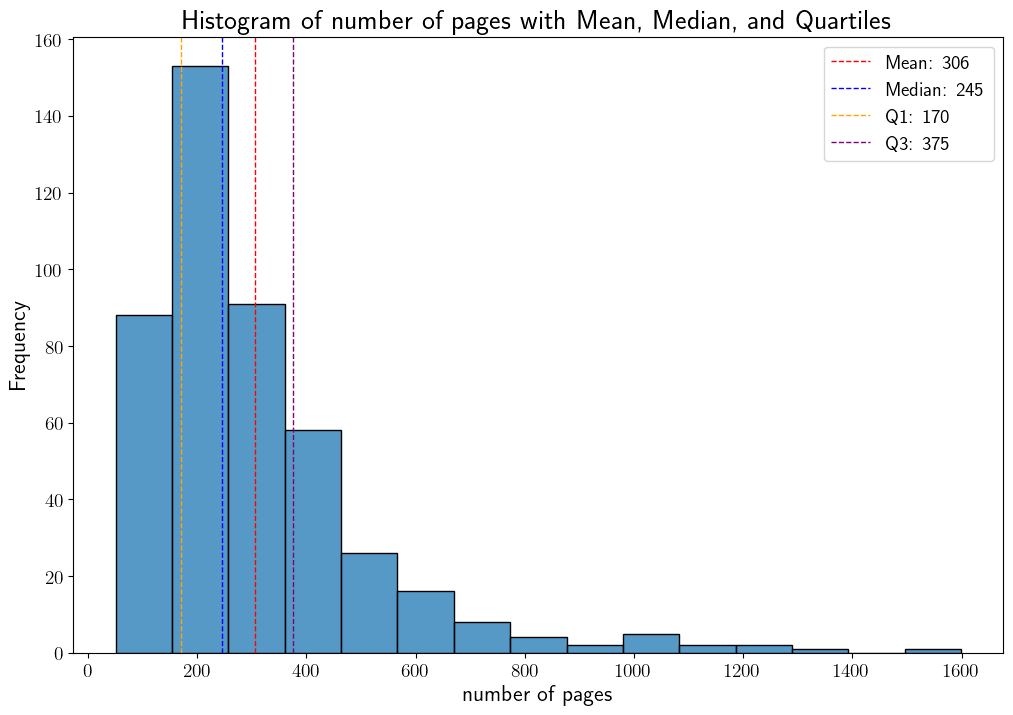

In [88]:
# Plot a histogram of column '# pages'
sns.histplot(df['# pages'], bins=15, kde=False)

# Add lines for mean, median, and quartiles
plt.axvline(mean_page, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_page:.0f}')
plt.axvline(median_page, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_page:.0f}')
plt.axvline(quartiles_page[0.25], color='orange', linestyle='dashed', linewidth=1, label=f'Q1: {quartiles_page[0.25]:.0f}')
plt.axvline(quartiles_page[0.75], color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {quartiles_page[0.75]:.0f}')

# add titles
plt.title('Histogram of number of pages with Mean, Median, and Quartiles')
# add labels
plt.xlabel('number of pages')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/first_hist.png')
plt.show()

In [89]:
# now I want to obtain the same information for the year of publication of these books - at the best of my ability ot retrieve
# the information about the publication year
df['year of publication'] = df['year of publication'].replace(['/', 'V.Y.'], np.nan)
publ_year = df['year of publication']

df['year of publication'] = pd.to_numeric(df['year of publication'], errors='coerce')
publ_year = df['year of publication']

mean_pub_year = publ_year.mean()
median_pub_year = publ_year.median()
quartiles_pub_year = publ_year.quantile([0.25,0.75])

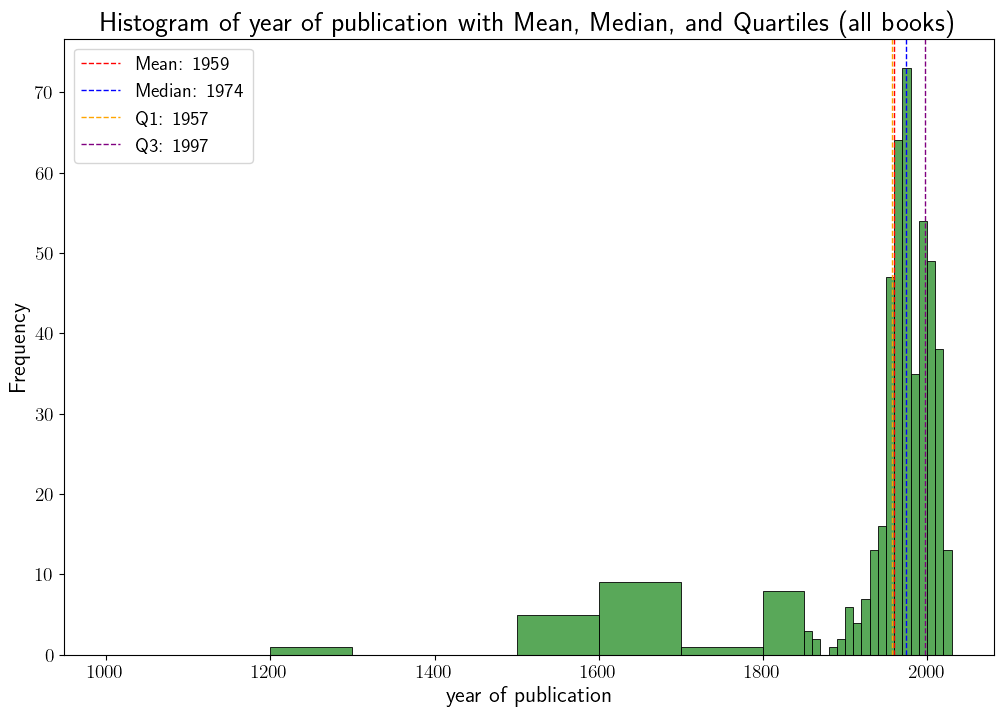

In [90]:
# Plot a histogram of column 'year of publication'
bins_publ_year = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1850,1860,1870,
                  1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,
                  2000,2010,2020,2030]

sns.histplot(publ_year, bins=bins_publ_year, kde=False, color='forestgreen')

# Add lines for mean, median, and quartiles
plt.axvline(mean_pub_year, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_pub_year:.0f}')
plt.axvline(median_pub_year, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_pub_year:.0f}')
plt.axvline(quartiles_pub_year[0.25], color='orange', linestyle='dashed', linewidth=1, label=f'Q1: {quartiles_pub_year[0.25]:.0f}')
plt.axvline(quartiles_pub_year[0.75], color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {quartiles_pub_year[0.75]:.0f}')

# add titles
plt.title('Histogram of year of publication with Mean, Median, and Quartiles (all books)')
# add labels
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/second_hist.png')
plt.show()

this is not a very pleasant histogram. let's try to obtain a plot only with the books published starting from 1900.

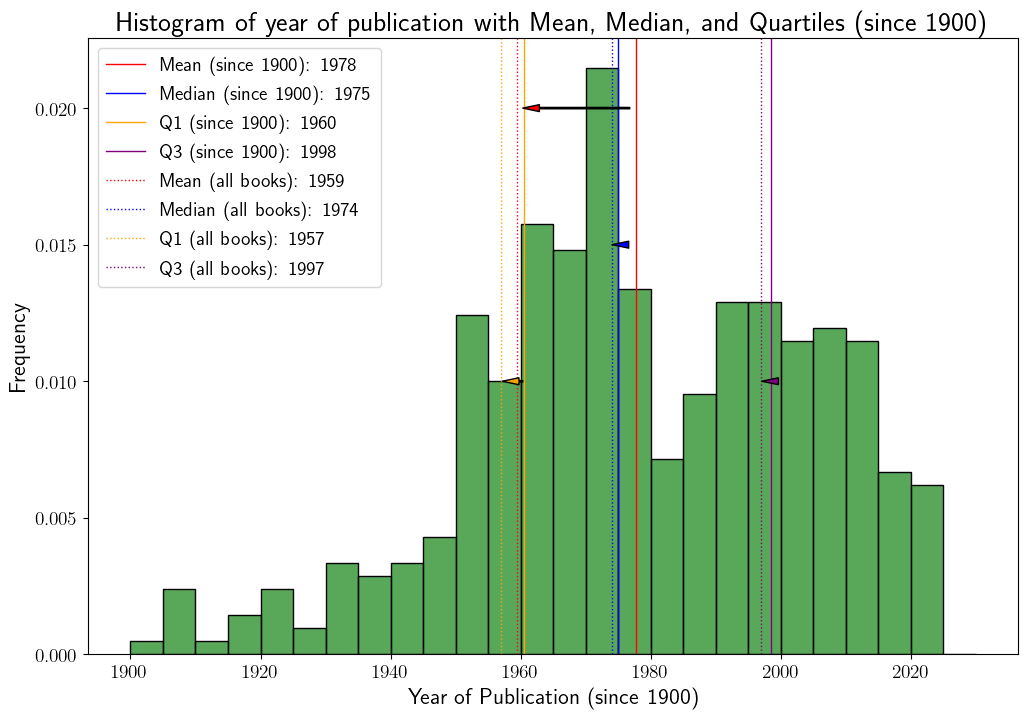

In [91]:
#####
# filter data for 20th century
publ_year_20th = publ_year[publ_year >= 1900]

bins_publ_year_20th = [1900,1905,1910,1915,1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,
                       1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030]
# plot histogram for the 20th century with density normalization
sns.histplot(publ_year_20th, bins=bins_publ_year_20th, stat='density', kde=False, color='forestgreen')

mean_pub_year_20th = publ_year_20th.mean()
median_pub_year_20th = publ_year_20th.median()
quartiles_pub_year_20th = publ_year_20th.quantile([0.25,0.75])

# add lines for mean, median, and quartiles only for books published after 1899
plt.axvline(mean_pub_year_20th, color='red', linestyle='solid', linewidth=1, label=f'Mean (since 1900): {mean_pub_year_20th:.0f}')
plt.axvline(median_pub_year_20th, color='blue', linestyle='solid', linewidth=1, label=f'Median (since 1900): {median_pub_year_20th:.0f}')
plt.axvline(quartiles_pub_year_20th[0.25], color='orange', linestyle='solid', linewidth=1, label=f'Q1 (since 1900): {quartiles_pub_year_20th[0.25]:.0f}')
plt.axvline(quartiles_pub_year_20th[0.75], color='purple', linestyle='solid', linewidth=1, label=f'Q3 (since 1900): {quartiles_pub_year_20th[0.75]:.0f}')

# add lines for mean, median, and quartiles for every book
plt.axvline(mean_pub_year, color='red', linestyle='dotted', linewidth=1, label=f'Mean (all books): {mean_pub_year:.0f}')
plt.axvline(median_pub_year, color='blue', linestyle='dotted', linewidth=1, label=f'Median (all books): {median_pub_year:.0f}')
plt.axvline(quartiles_pub_year[0.25], color='orange', linestyle='dotted', linewidth=1, label=f'Q1 (all books): {quartiles_pub_year[0.25]:.0f}')
plt.axvline(quartiles_pub_year[0.75], color='purple', linestyle='dotted', linewidth=1, label=f'Q3 (all books): {quartiles_pub_year[0.75]:.0f}')

# let's add some arrows that relate the different statistical quantities 
plt.annotate('', xy=(mean_pub_year, 0.02), xytext=(mean_pub_year_20th, 0.02),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5))
plt.annotate('', xy=(median_pub_year, 0.015), xytext=(median_pub_year_20th, 0.015),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=5))
plt.annotate('', xy=(quartiles_pub_year[0.25], 0.01), xytext=(quartiles_pub_year_20th[0.25], 0.01),
             arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=5))
plt.annotate('', xy=(quartiles_pub_year[0.75], 0.01), xytext=(quartiles_pub_year_20th[0.75], 0.01),
             arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=5))

# add titles
plt.title('Histogram of year of publication with Mean, Median, and Quartiles (since 1900)')
# add labels
plt.xlabel('Year of Publication (since 1900)')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/third_hist.png')

plt.show()

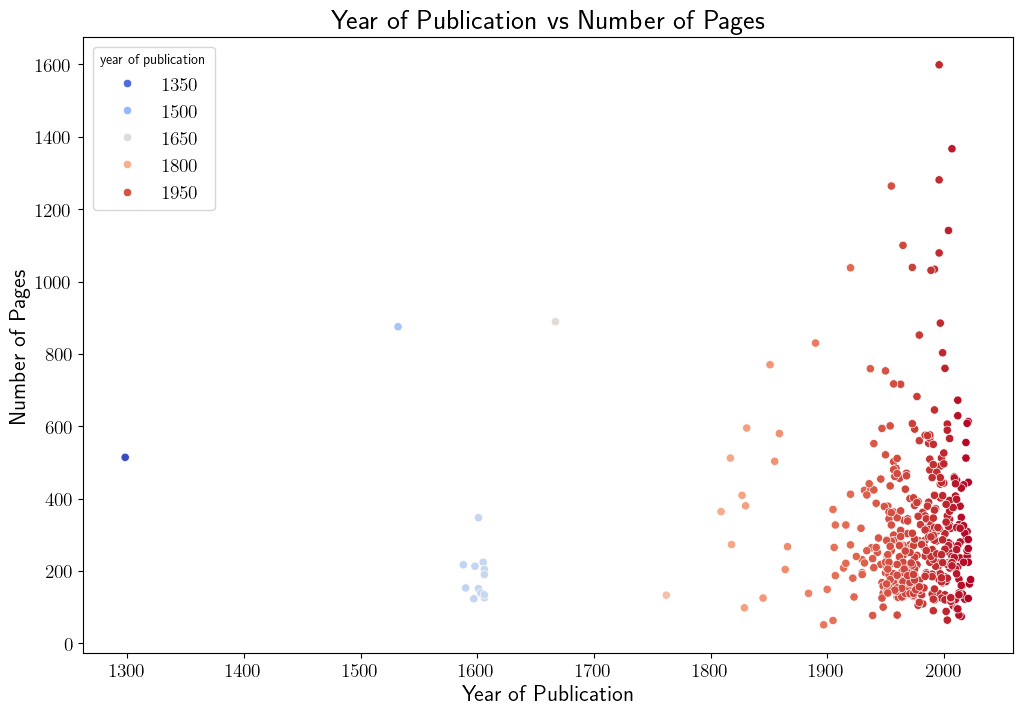

In [92]:
books_data_df = df[['# pages', 'year of publication']]
# Create the scatter plot (x-y plot)
sns.scatterplot(data=books_data_df, 
                x='year of publication', 
                y='# pages', 
                hue='year of publication', 
                palette='coolwarm')

# Add labels and a title
plt.xlabel('Year of Publication')
plt.ylabel('Number of Pages')
plt.title('Year of Publication vs Number of Pages')

# Show the plot
plt.savefig('notebook_images/first_plot.png')
plt.show()

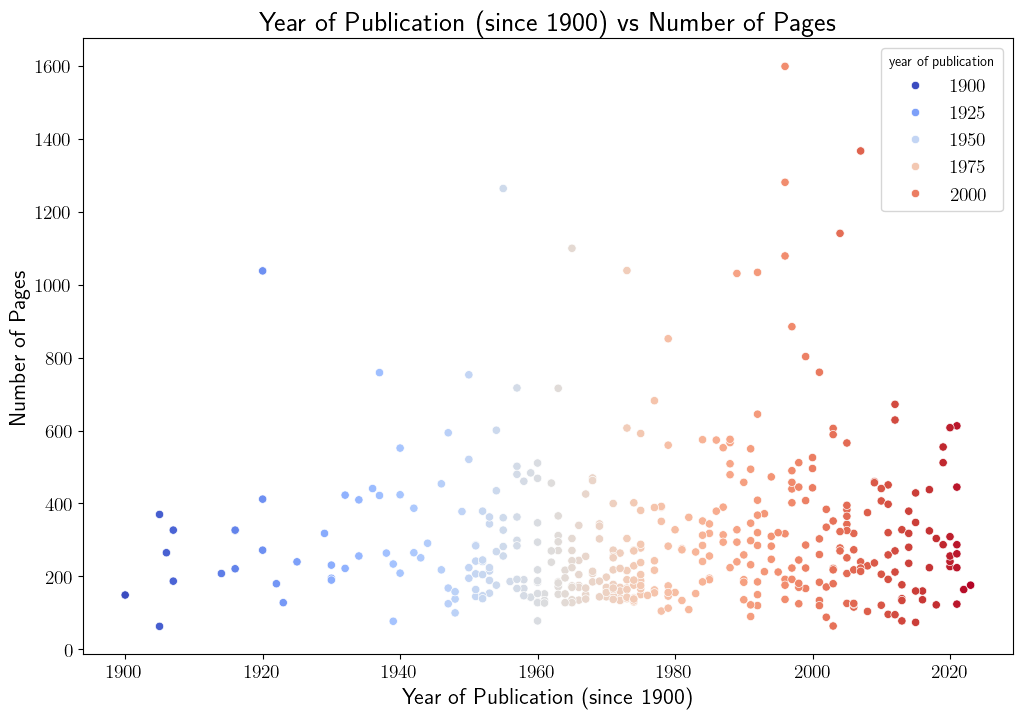

In [93]:
books_data_df_20th = df[df['year of publication'] > 1899]
# Create the scatter plot (x-y plot)
sns.scatterplot(data=books_data_df_20th, 
                x='year of publication', 
                y='# pages', 
                hue='year of publication', 
                palette='coolwarm')

# Add labels and a title
plt.xlabel('Year of Publication (since 1900)')
plt.ylabel('Number of Pages')
plt.title('Year of Publication (since 1900) vs Number of Pages')

# Show the plot
plt.savefig('notebook_images/second_plot.png')
plt.show()

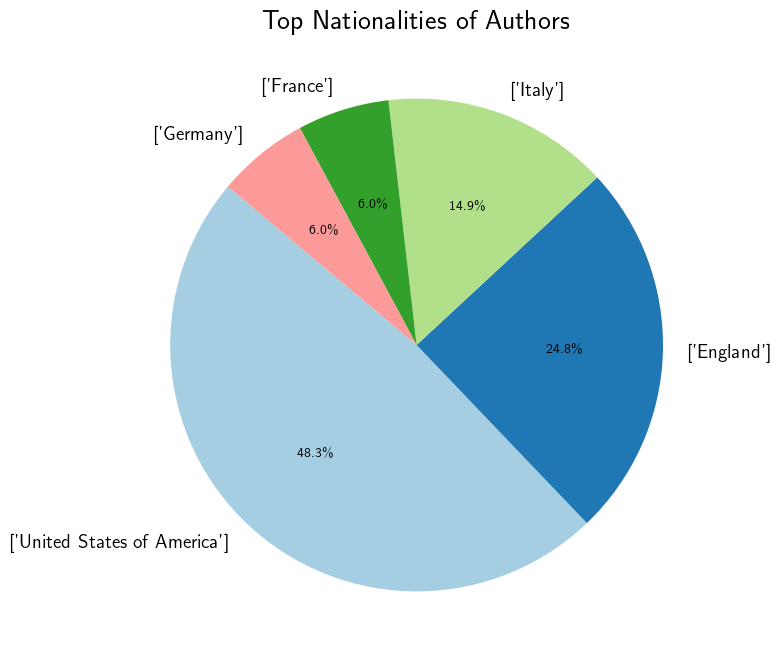

In [94]:
# Expand the DataFrame to have one nationality per row
# Split the 'nationalities' column by comma and explode into separate rows
df_expanded = df.assign(nationalities=df['nationality'].str.split(' - ')).explode('nationality')

# Remove any extra spaces and convert to lower case for consistency
df_expanded['nationality'] = df_expanded['nationality'].str.strip().str.lower()

# Count occurrences and filter top nationalities
nationality_counts = df_expanded['nationalities'].value_counts()
top_nationalities = nationality_counts.head(5)  # Change 5 to the number of top nationalities you want to display

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_nationalities, 
        labels=top_nationalities.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired(range(len(top_nationalities))))
plt.title('Top Nationalities of Authors')
plt.savefig('notebook_images/third_plot.png')

plt.show()

/var/folders/j4/6b1360d55ljdykkmtn15fj800000gn/T/ipykernel_79954/2903855139.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


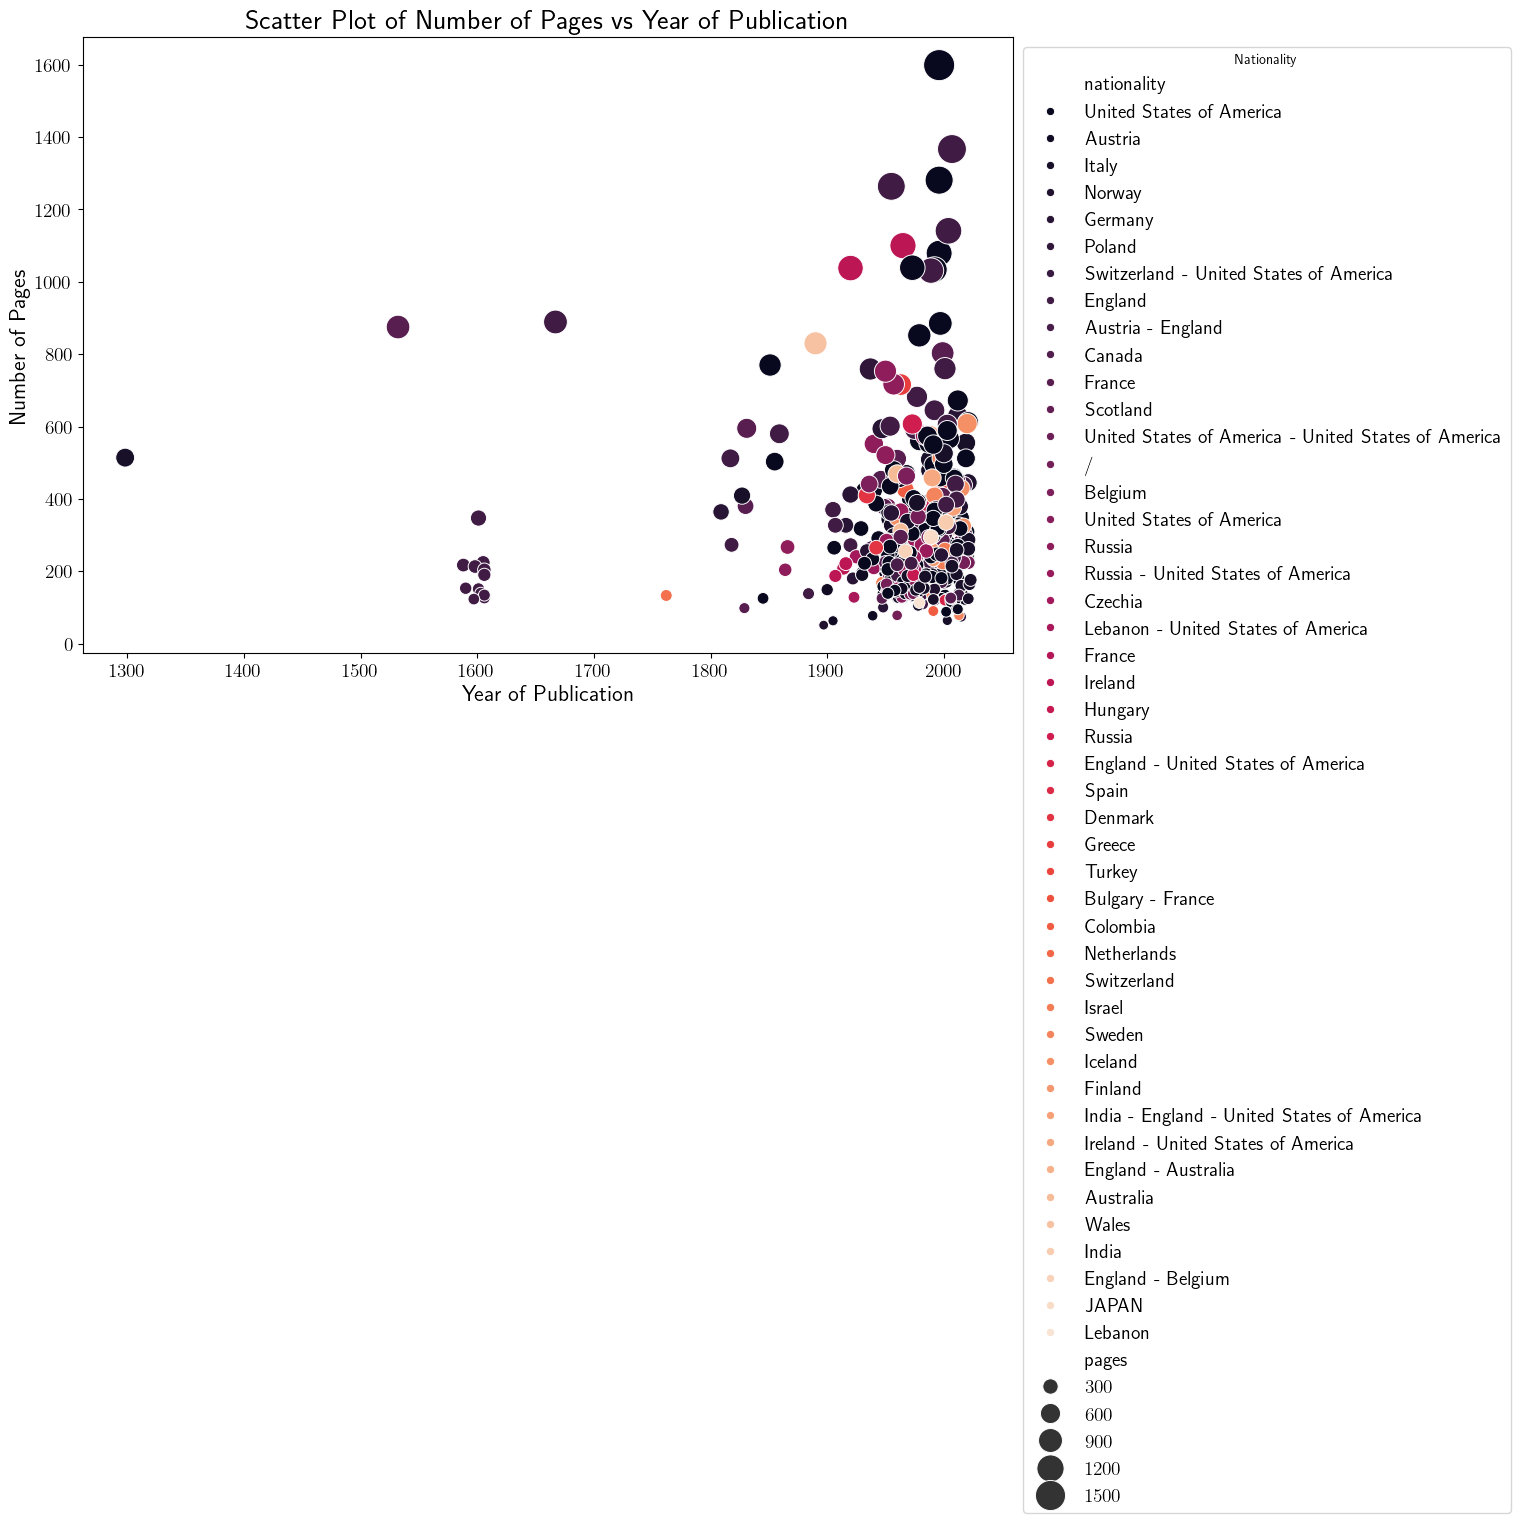

In [95]:
# rename columns to avoid LaTeX issues
df = df.rename(columns={'# pages': 'pages', 'year of publication': 'publication_year'})

# Create scatter plot
sns.scatterplot(data=df[['pages', 'publication_year', 'nationality']], 
                x='publication_year', 
                y='pages', 
                hue='nationality', 
                palette="rocket", 
                size='pages', 
                sizes=(50, 500), 
                legend='brief')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Nationality')
plt.title('Scatter Plot of Number of Pages vs Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Pages')

plt.tight_layout()

plt.savefig('notebook_images/fourth_plot.png')
plt.show()

/var/folders/j4/6b1360d55ljdykkmtn15fj800000gn/T/ipykernel_79954/4275005953.py:12: UserWarning: The palette list has more values (46) than needed (45), which may not be intended.
  scatter = sns.scatterplot(data=df3_20th,


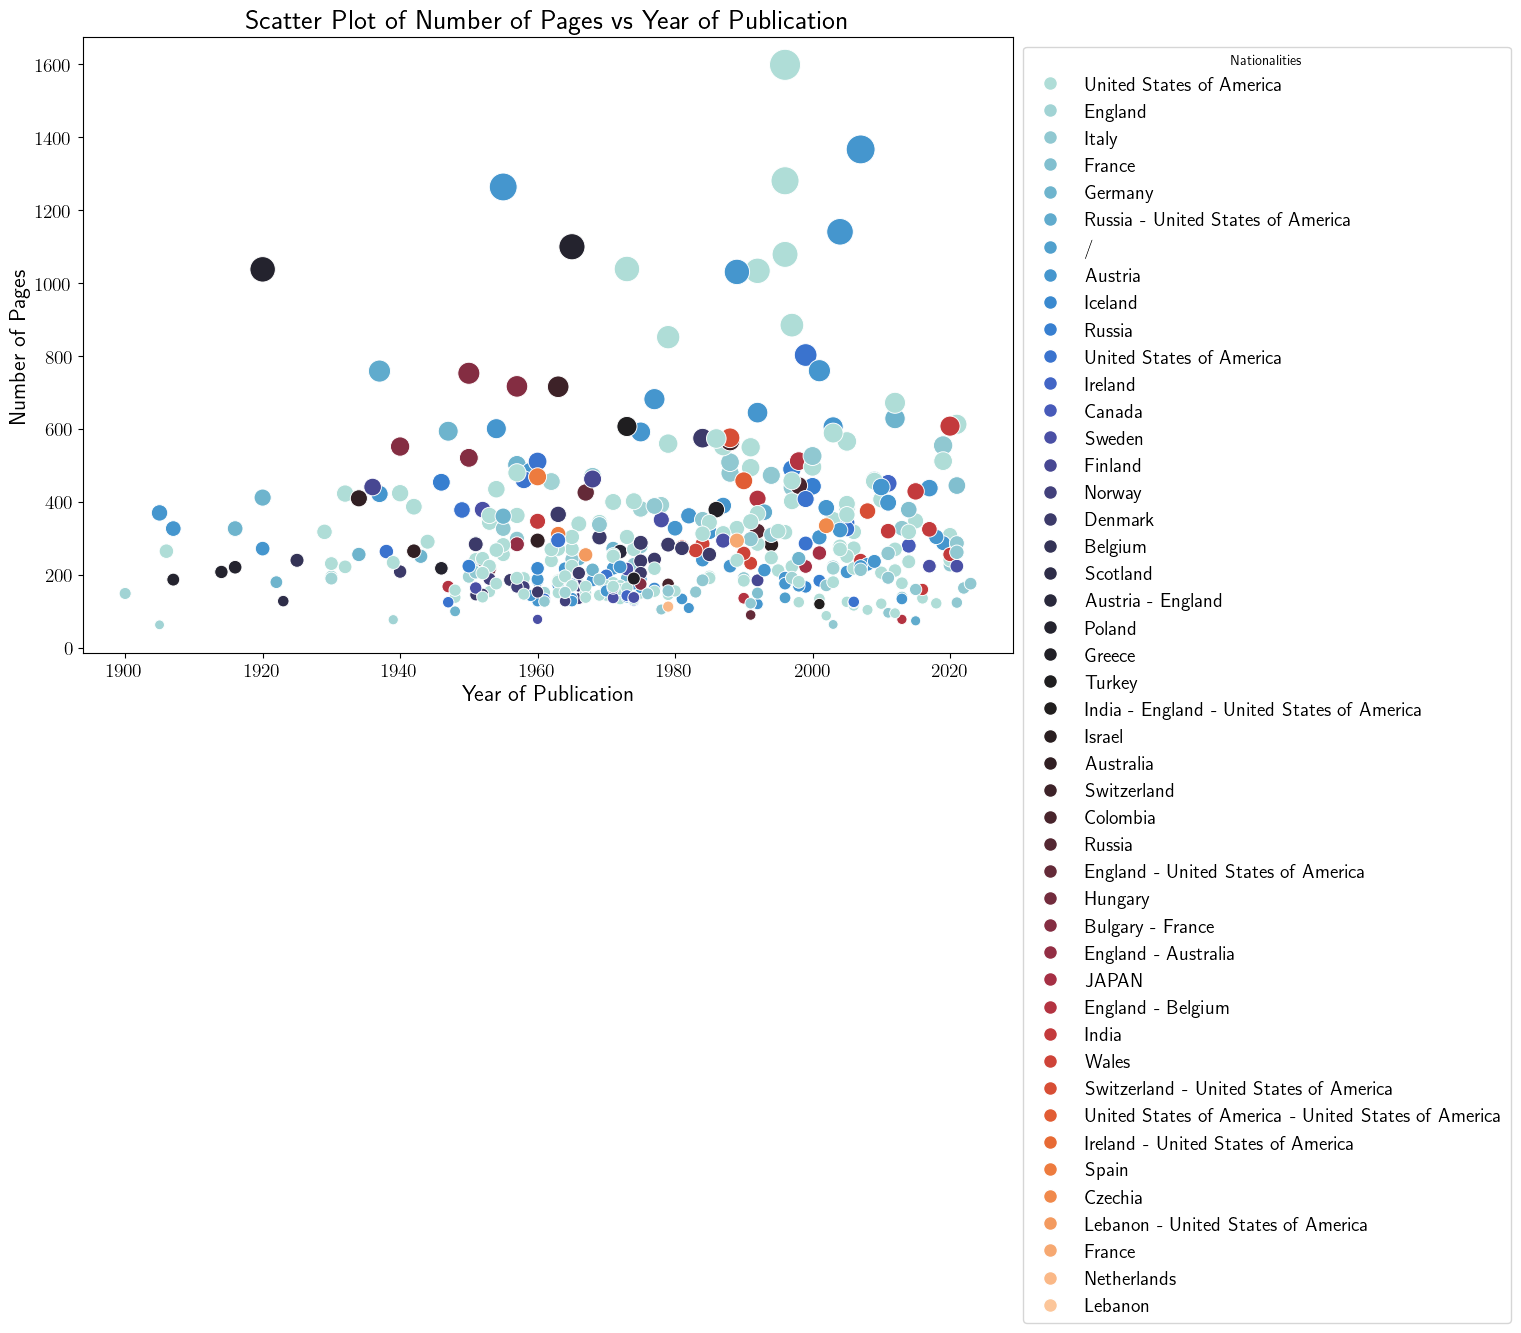

In [96]:
# Filter DataFrame for 20th century
df3_20th = df[df['publication_year'] > 1899]

# Calculate the counts of each nationality
nationality_counts = df['nationality'].value_counts()
sorted_nationalities = nationality_counts.index

# Use the same palette for scatter plot and legend
palette = sns.color_palette("icefire", len(sorted_nationalities))

# Create scatter plot
scatter = sns.scatterplot(data=df3_20th, 
                          x='publication_year', 
                          y='pages', 
                          hue='nationality', 
                          palette=palette,  # Use the same palette
                          size='pages', 
                          sizes=(50, 500))

# Create legend handles based on sorted nationalities and the colors used
handles = [Line2D([0], 
                  [0], 
                  marker='o', 
                  color='w', 
                  label=label,
                  markerfacecolor=palette[i], 
                  markersize=10)
           for i, label in enumerate(sorted_nationalities)]

# Add custom legend to the plot
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), title='Nationalities')

# Add titles and labels
plt.title('Scatter Plot of Number of Pages vs Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Pages')

# Show the plot
plt.savefig('notebook_images/fifth_plot.png')
plt.show()

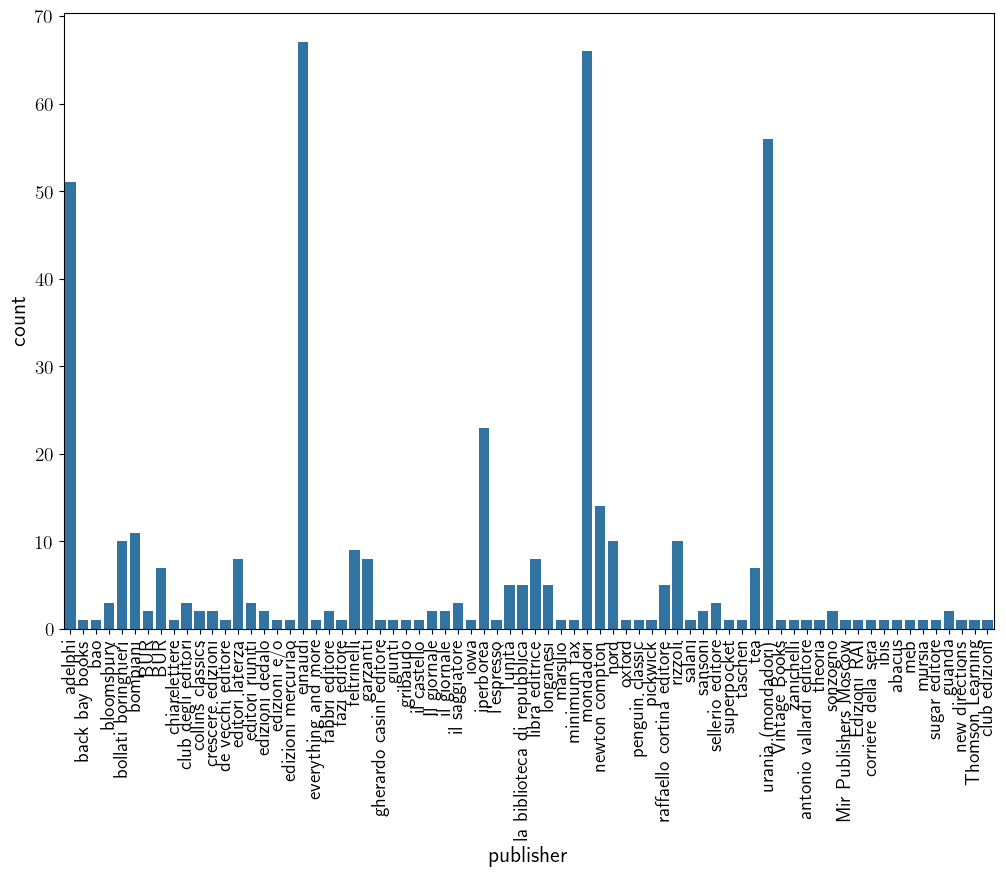

In [97]:
#let's create an histogram with the publisher data 
# Create a countplot to show the distribution of publishers
sns.countplot(data=df, x='publisher')

# Rotate x-axis labels if there are many unique publishers
plt.xticks(rotation=90)

# Show the plot
plt.savefig('notebook_images/stack_bar_publisher.png')
plt.show()

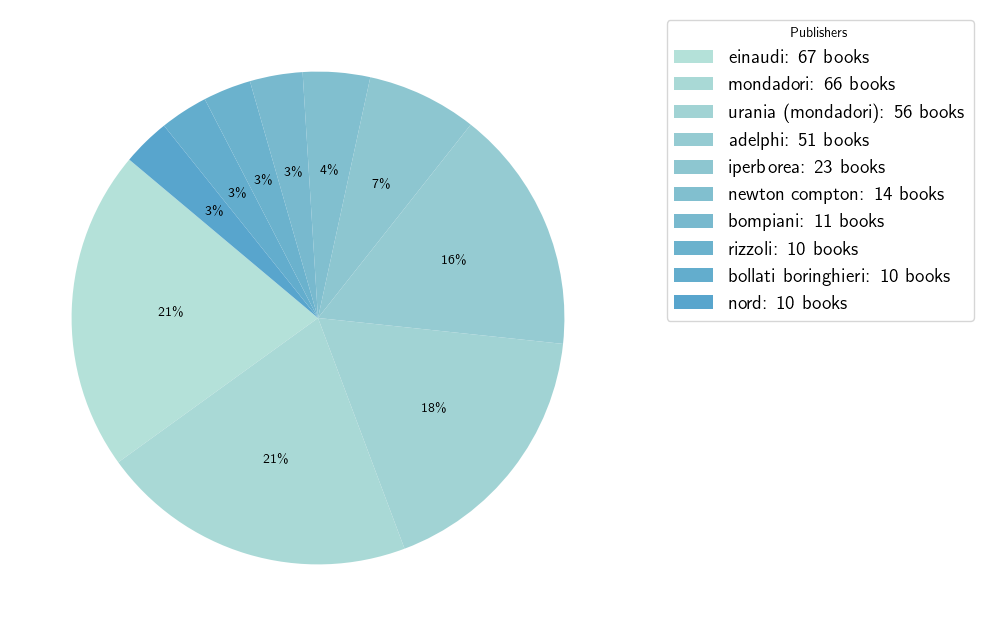

In [98]:
# Count the occurrences of each publisher
publisher_counts = df['publisher'].value_counts()
sorted_publisher = publisher_counts.index
top_publisher = publisher_counts.head(10)  # Change 5 to the number of top nationalities you want to display
palette = sns.color_palette("icefire", len(sorted_publisher))
# Plot pie chart
wedges, texts, autotexts = plt.pie(top_publisher, 
                                   autopct='%1.0f%%', 
                                   startangle=140, 
                                   colors=palette)
# Adding a custom legend with publisher names and counts
legend_labels = [f"{publisher}: {count} books" for publisher, 
                                                   count in zip(top_publisher.index, 
                                                                top_publisher.values)]
plt.legend(wedges, 
           legend_labels, 
           title="Publishers", 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

plt.savefig('notebook_images/pie_chart_publisher.png')
plt.show()

                                     title  pages  publication_year  \
176  vita e morte dell'ordine dei templari    326            2005.0   
412                     romanzi e racconti    497               NaN   
285                   Racconti del terrore    125            1845.0   
212                              racconti     289               NaN   
428                                 logica    214            2007.0   
..                                     ...    ...               ...   
208                                macbeth    126            1606.0   
211                      romeo e giulietta    123            1597.0   
209                                 otello    139            1603.0   
207                                 amleto    151            1601.0   
384                       segnali da giove    156            1980.0   

                         author                    publisher year of birth  \
176              Alain Demurger                  Il giornale         

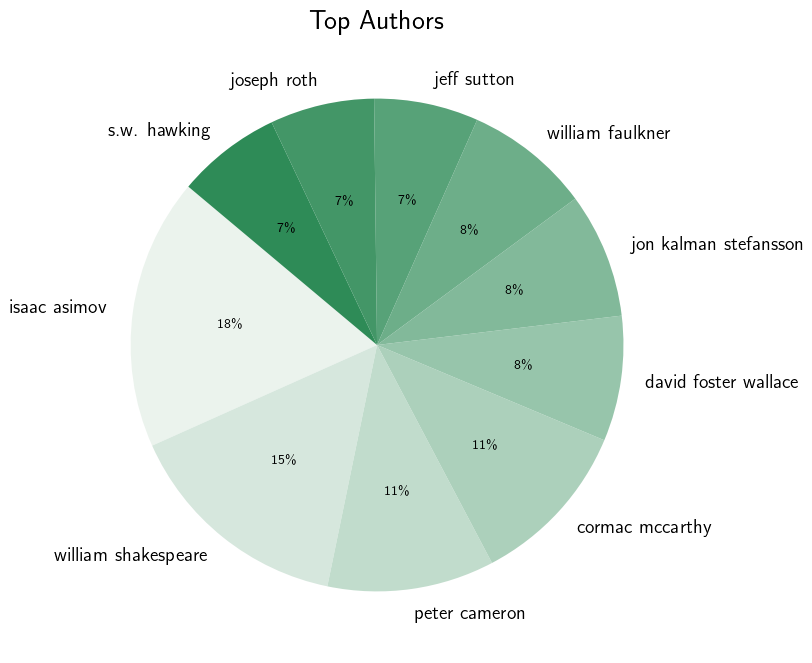

In [99]:
# Create a new pie chart with the top 10 authors

# Split the 'author' column by comma and explode into separate rows
filtered_df = df[df['author'] != 'VV.AA.']
print(filtered_df.sort_values(by='author'))
df_expanded = filtered_df.assign(authors=filtered_df['author'].str.split(' - ')).explode('author')

# Remove any extra spaces and convert to lower case for consistency
df_expanded['author'] = df_expanded['author'].str.strip().str.lower()

# Count occurrences and filter top nationalities
author_counts = df_expanded['author'].value_counts()
top_authors = author_counts.head(10)  # Change 5 to the number of top author you want to display

this_palette = sns.light_palette("seagreen", len(top_authors))
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_authors, 
        labels=top_authors.index, 
        autopct='%1.0f%%', 
        startangle=140, 
        colors=this_palette)
plt.title('Top Authors')
plt.savefig('notebook_images/pie_chart_author.png')

plt.show()

/var/folders/j4/6b1360d55ljdykkmtn15fj800000gn/T/ipykernel_79954/1431894775.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap(this_color, len(sorted_unique_countries))


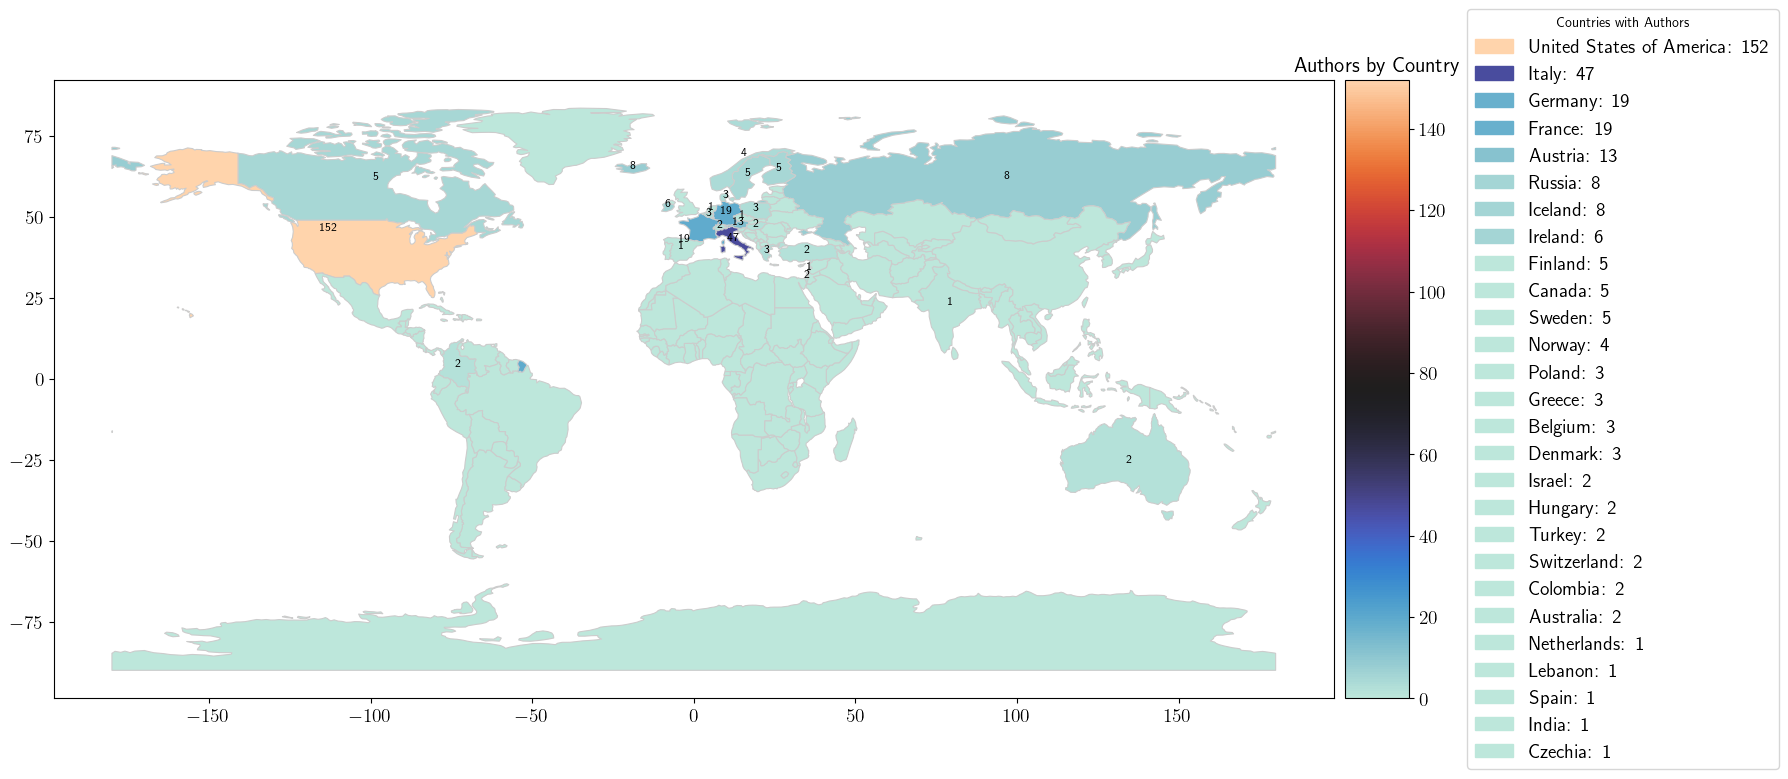

In [103]:
# Let's create a world map for the authors
#the color of this world map
this_color = 'icefire'
# provide the path for the shapefile...
shapefile_path = os.path.join('world_data/', 'ne_110m_admin_0_countries_lakes.shp')
# ...and load it
world = gpd.read_file(shapefile_path)
# the shapefile contains 'country' column with country names
# I called it 'nationality', so I have to change it
# Rename columns to match for the merge
df.rename(columns={'nationality': 'country'}, inplace=True)

# Create 'authors_count' column in the authors DataFrame
df['authors_count'] = 1  # Each row represents one author

# Aggregate counts by country
authors_count = df[df['author'] != 'VV.AA.'].groupby('country')['authors_count'].sum().reset_index()

# Merge the world map with your authors' data
world_authors = world.merge(authors_count, how='left', left_on='ADMIN', right_on='country')

# Fill NaN values with 0 (countries with no authors in your dataset)
world_authors['authors_count'] = world_authors['authors_count'].fillna(0)
  
# Normalize the colormap for better contrast
norm = mcolors.Normalize(vmin=world_authors['authors_count'].min(), vmax=world_authors['authors_count'].max())


# Plot the map with authors count as the colormap
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
world_authors.plot(column='authors_count', 
                   cmap=this_color, 
                   linewidth=0.8, 
                   edgecolor='0.8', 
                   #legend=True,
                   norm = norm, 
                   ax=ax)

# Create a colorbar axis next to the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=this_color, norm=norm)
sm._A = []  # Only necessary for compatibility reasons
fig.colorbar(sm, cax=cax)

# Add text annotations - if you want uncomment this
for idx, row in world_authors.iterrows():
    if row['authors_count'] > 0:  # Only label countries with authors
        # Get the centroid of the geometry for annotation position
        x, y = row['geometry'].centroid.coords[0]
        # Annotate the plot with the number of authors
        ax.annotate(
            text=int(row['authors_count']),  # The text to display
            xy=(x, y),  # Position of the annotation
            ha='center',  # Horizontal alignment
            fontsize=8,  # Font size
            color='black'  # Font color
        )
        
# # Create a custom legend with country names and counts
unique_countries = world_authors[world_authors['authors_count'] > 0][['ADMIN', 'authors_count']]
sorted_unique_countries = unique_countries.sort_values(by='authors_count', ascending=False)

# Generate colors for each country based on the colormap and author count
colormap = plt.cm.get_cmap(this_color, len(sorted_unique_countries))
legend_patches = []
for _, row in sorted_unique_countries.iterrows():
    color = colormap(norm(row['authors_count']))  # Get color from the colormap
    patch = mpatches.Patch(color=color, label=f"{row['ADMIN']}: {int(row['authors_count'])}")
    legend_patches.append(patch)
    
# Add the custom legend to the plot
plt.legend(handles=legend_patches, 
           title="Countries with Authors", 
           loc='center left', 
           bbox_to_anchor=(1.75, 0.5))

# Add a title
plt.title('Authors by Country', fontsize=15)
plt.tight_layout()

# Show the plot
plt.savefig('notebook_images/world_map.png', bbox_inches='tight')
plt.show()

                    author  pages
60    david foster wallace   3888
128           isaac asimov   3393
56         cormac mccarthy   2899
133          j.r.r.tolkien   2672
175            ken follett   2398
300       william faulkner   2263
165  jon kalman stefansson   2178
302    william shakespeare   2004
291            umberto eco   1897
230          peter cameron   1616


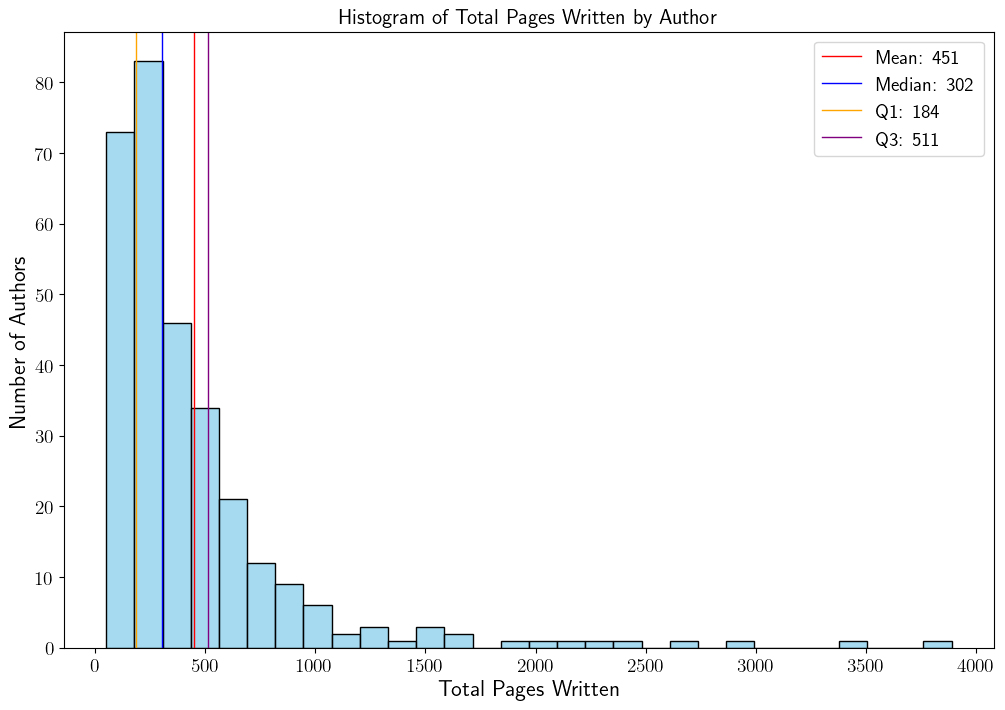

In [101]:
# Let's create an histogram with the most prolific writers
filtered_df = df[df['author'] != 'VV.AA.']
author_pages = filtered_df.groupby('author')['pages'].sum().reset_index()
author_pages = author_pages.sort_values(by='pages', ascending=False)
print(author_pages.head(10))

sns.histplot(author_pages['pages'], bins=30, kde=False, color='skyblue')

# Add titles and labels
plt.title('Histogram of Total Pages Written by Author', fontsize=15)
plt.xlabel('Total Pages Written')
plt.ylabel('Number of Authors')

mean_author_page = author_pages['pages'].mean()
median_author_page = author_pages['pages'].median()
quartiles_author_page = author_pages['pages'].quantile([0.25,0.75])

# add lines for mean, median, and quartiles only for books published after 1899
plt.axvline(mean_author_page, color='red', linestyle='solid', linewidth=1, label=f'Mean: {mean_author_page:.0f}')
plt.axvline(median_author_page, color='blue', linestyle='solid', linewidth=1, label=f'Median: {median_author_page:.0f}')
plt.axvline(quartiles_author_page[0.25], color='orange', linestyle='solid', linewidth=1, label=f'Q1: {quartiles_author_page[0.25]:.0f}')
plt.axvline(quartiles_author_page[0.75], color='purple', linestyle='solid', linewidth=1, label=f'Q3: {quartiles_author_page[0.75]:.0f}')

plt.legend()


# Show the plot
plt.savefig('notebook_images/author_pages_histogram.png')
plt.show()

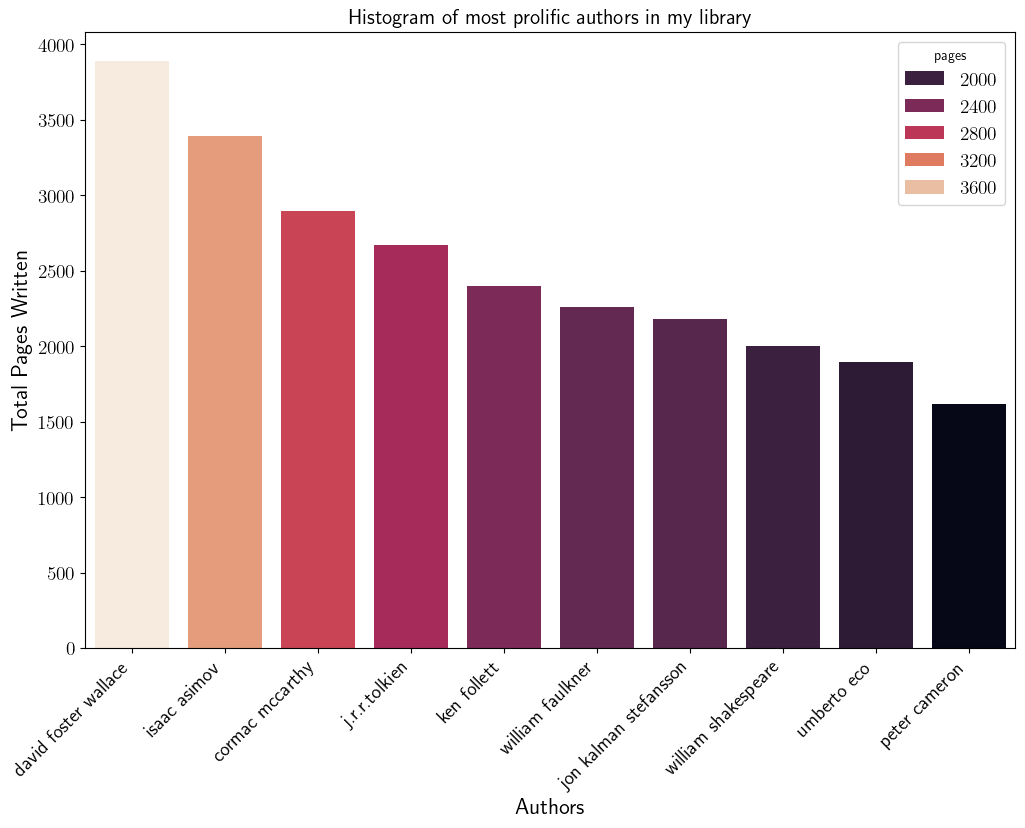

In [102]:
# now I will print out a plot for just the first 10 authors which have written the most pages
prolific_authors_df = author_pages.head(10)

barplot = sns.barplot(x=prolific_authors_df['author'], 
            y=prolific_authors_df['pages'], 
            hue=prolific_authors_df['pages'],
            palette='rocket',
            clip_on=False,
            data= prolific_authors_df
            )
    
# Add titles and labels
plt.title('Histogram of most prolific authors in my library', fontsize=15)
plt.xlabel('Authors')
plt.ylabel('Total Pages Written')
    
# Adjust layout for better visualization
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.savefig('notebook_images/prolific_authors.png')
plt.show()